```markdown
Typical flow includes:

## 1. Getting data ready 
## 2. Building a model 
## 3. Fitting the model to data (training)
## 4. Making predictions and evaluating a model (inference) 
## 5. Saving and loading a model
```



In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


```markdown
## 1. Getting data ready
```

In [2]:
# let's create a guffy dataset
x = torch.arange(0, 1, 0.02).view(-1, 1)
y = 0.7 * x + 0.2

# split train:0.8, test:0.2
n_train = int(0.8 * len(x))

x_train,y_train = x[:n_train], y[:n_train]
x_test,y_test = x[n_train:], y[n_train:]

print(f"x_train: {x_train.shape} - y_train: {y_train.shape}")
print(f"x_test : {x_test.shape} - y_test : {y_test.shape}")

x_train: torch.Size([40, 1]) - y_train: torch.Size([40, 1])
x_test : torch.Size([10, 1]) - y_test : torch.Size([10, 1])


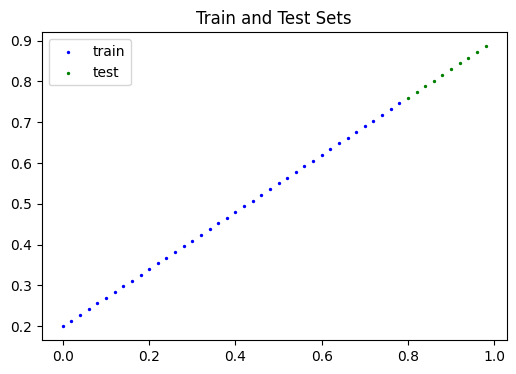

In [3]:
# plot the data
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, s=2, c='b', label='train')
plt.scatter(x_test, y_test, s=2, c='g', label='test')
plt.title('Train and Test Sets')
plt.legend()

In [4]:
def plot_predictions(predictions=None):
    # plot the data
    plt.figure(figsize=(6, 4))
    plt.scatter(x_train, y_train, s=2, c='b', label='train')
    plt.scatter(x_test, y_test, s=2, c='g', label='test')
    if predictions is not None:
        plt.scatter(x_test, predictions, s=2, c='r', label='preds')
    plt.title('Dataset and Predictions')
    plt.legend()

```markdown
## 2. Build the model
```

In [5]:
## create a simple linear model
def get_model():
    return nn.Sequential(nn.Linear(1, 1, bias=True))
    
model = get_model()
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


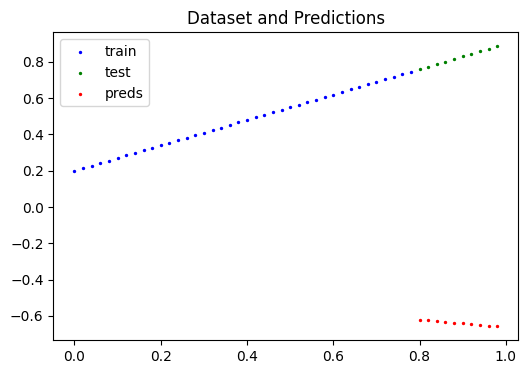

In [55]:
with torch.inference_mode():
    predictions = model(x_test)
plot_predictions(predictions)

```markdown
## 3. Fitting the model to data (training)
```


In [16]:

LR = 0.1
EPOCHS = 100

#model
model = get_model()
# loss 
loss = nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

# track metrics
train_losses = []
test_losses = []

# Training loop
for epoch in range(EPOCHS):
    #forward pass
    y_predicted = model(x_train)
    # loss
    train_loss = loss(y_train, y_predicted)

    # calculate gradients 
    train_loss.backward()
    # update weights
    optimizer.step()
    # zero the gradients after updating
    optimizer.zero_grad()
    
    # inference loss
    with torch.inference_mode():
        y_test_predicted = model(x_test)
        test_loss = loss(y_test, y_test_predicted)

        if epoch % 50 == 0:
            train_losses.append(train_loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())
            print(f"Epoch {epoch} - Train MSE: {train_loss.item():.2f} - Test MSE: {test_loss.item():.2f}")



Epoch 0 - Train MSE: 0.73 - Test MSE: 0.59
Epoch 50 - Train MSE: 0.01 - Test MSE: 0.01
Epoch 100 - Train MSE: 0.00 - Test MSE: 0.02
Epoch 150 - Train MSE: 0.00 - Test MSE: 0.01
Epoch 200 - Train MSE: 0.00 - Test MSE: 0.01
Epoch 250 - Train MSE: 0.00 - Test MSE: 0.01
Epoch 300 - Train MSE: 0.00 - Test MSE: 0.01
Epoch 350 - Train MSE: 0.00 - Test MSE: 0.01
Epoch 400 - Train MSE: 0.00 - Test MSE: 0.00
Epoch 450 - Train MSE: 0.00 - Test MSE: 0.00
Epoch 500 - Train MSE: 0.00 - Test MSE: 0.00
Epoch 550 - Train MSE: 0.00 - Test MSE: 0.00


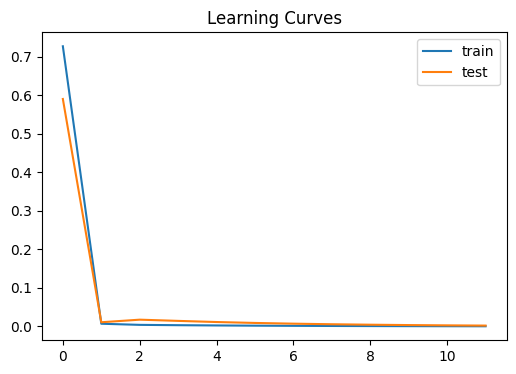

In [17]:
#learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.title('Learning Curves')
plt.legend()

```markdown
## 4. Making predictions and evaluating a model (inference)
```

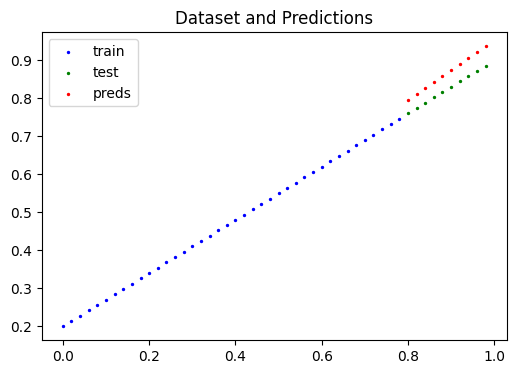

In [18]:
#plot new predictions
with torch.inference_mode():
    y_test_predicted = model(x_test)
plot_predictions(y_test_predicted)

```markdown
## 5. Saving and loading a model

`torch.save(model.state_dict(), 'model.pth')`
`torch.load('model.pth')`
`model.load_state_dict(torch.load('model.pth'))`
```


In [109]:
model.state_dict()

OrderedDict([('0.weight', tensor([[0.6621]])), ('0.bias', tensor([0.2155]))])

In [122]:
# save model

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "model_001.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: models/model_001.pth


In [123]:
#load model
model_from_disk = get_model()
model_from_disk.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.state_dict()

OrderedDict([('0.weight', tensor([[0.6621]])), ('0.bias', tensor([0.2155]))])

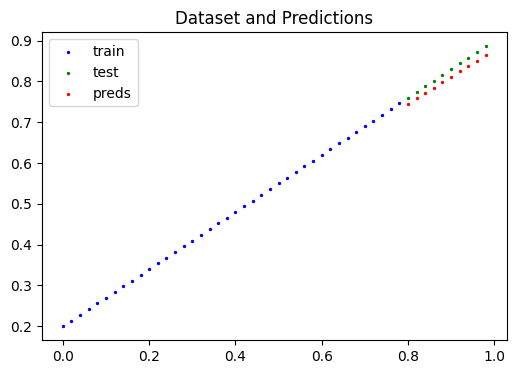

In [124]:
with torch.inference_mode():
    y_test_predicted = model_from_disk(x_test)
plot_predictions(y_test_predicted)

Saving model to: models/model_002.pth


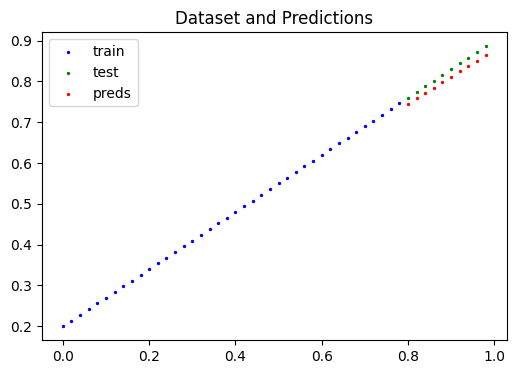

In [125]:
# save the whole model
MODEL_NAME = "model_002.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model, f=MODEL_SAVE_PATH)

# load the whole model
model_from_disk = torch.load(MODEL_SAVE_PATH)
with torch.inference_mode():
    y_test_predicted = model_from_disk(x_test)
plot_predictions(y_test_predicted)
